## W2M5 - Sentiment Analysis

In [32]:
# 사용 패키지
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google_play_scraper import app, reviews
from konlpy.tag import Okt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# 파일 불러오기
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = 'ISO-8859-1', header = None)
df.columns = ['sentiment', 'ID', 'timestamp', 'flag', 'username', 'text']
df

,sentiment,ID,timestamp,flag,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


텍스트를 샘플링하는 것은 두가지의 방법이 존재할 것이다.
1. 문장(트위터) 샘플링
2. 단어 샘플링
   
문장 샘플링에 경우에는 데이터가 매우 크다면 고려해야할 방법으로, 데이터 샘플링을 통해서 실행 시간 측면에서 효율성을 가질 수 있도록 하는 방법일 것이다. df.sample()을 사용한다면 쉽게 샘플링이 진행된다.</br>
단어 샘플링은 전처리 과정을 통해 wordcloud 자체가 활용 목적에 적합한 결과가 나올 수 있도록 하여, wordcloud의 질 자체를 올려주는 샘플링일 것이다.</br>

일반적인 텍스트 전처리는 다음을 포함한다.
1. 불용어 처리
2. 대소문자 통일
3. Stemming(어미 제거)
4. 공백, 숫자, 특수문자 제거

In [34]:
# sentiment별 데이터 나누기
negative_df = df[df['sentiment'] == 0]
positive_df = df[df['sentiment'] == 4]

In [35]:
# text 열의 모든 문자열 데이터 연결해서 하나의 긴 문자열로 만들기
negative_text = " ".join(negative_df['text'].astype(str))
positive_text = " ".join(positive_df['text'].astype(str))

### 텍스트 전처리 함수

In [36]:
# Text Normaliztion 단계
def text_normalizing(text) :

    # 1. 소문자 변환
    text1 = text.lower()

    # 2. 숫자 제거
    text2 = re.sub(r'\d+', '', text1)

    # 3. 문장부호 제거
    text3 = re.sub(r'[^\w\s]', '', text2)

    # 4. 공백 제거 (여러 공백을 하나로 줄임)
    normalized_text = re.sub(r'\s+', ' ', text3).strip()

    return normalized_text

# Text Stemming 단계
def stemming(text) :

    # Stemming
    stemmer = PorterStemmer()
    stemmed_text = " ".join([stemmer.stem(w) for w in text.split()])

    return stemmed_text

# Remove stopwords 단계
def remove_stopwords(text) :
    stop_words = list(set(stopwords.words('english')))
    stop_words.extend(['amp', 'quot', 'ca', 'nt', 'one', 'lol', 'today', 'im', 'go'])
    filtered_text = " ".join([w for w in text.split() if w.lower() not in stop_words])
    return filtered_text

# text preprocessing 단계
def preprocessed(text) :
    normalized_text = text_normalizing(text)
    stemmed_text = stemming(normalized_text)
    preprocessed_text = remove_stopwords(stemmed_text)
    return preprocessed_text

In [39]:
# 전처리가 진행된 전체 텍스트를 하나의 긴 문자열로 생성
sampled_negative_text = preprocessed(negative_text)
sampled_positive_text = preprocessed(positive_text)

In [65]:
# Wordcloud 생성, 단어의 빈도가 기준
# 최대 단어 개수를 200개로 설정
negative_wordcloud = WordCloud(max_words=200, colormap = 'gist_heat_r').generate(sampled_negative_text)
positive_wordcloud = WordCloud(max_words=200, colormap = 'viridis', background_color = 'white').generate(sampled_positive_text)

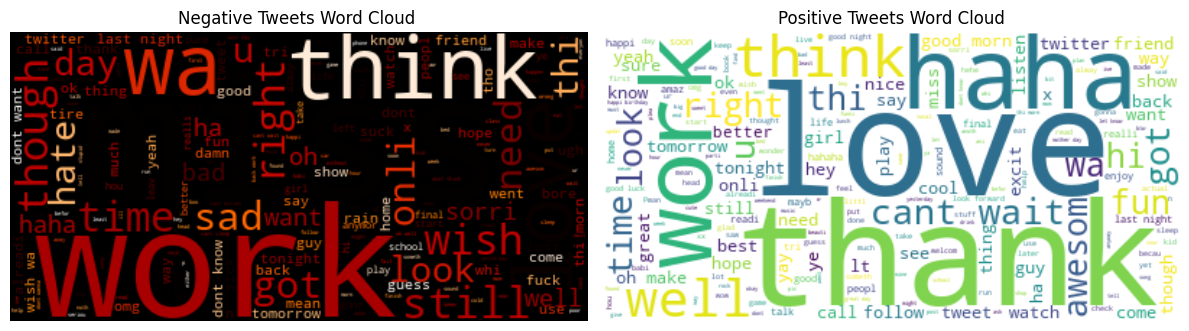

In [66]:
# Negative wordcloud
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.title("Negative Tweets Word Cloud ")
plt.axis('off')

# Positive wordcloud
plt.subplot(1, 2, 2)
plt.imshow(positive_wordcloud, interpolation = 'bilinear')
plt.title("Positive Tweets Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()

Negative에서는 'still', 'though', 'work', 'miss', 'love'가 부정적인 단어로 많이 쓰인다.</br>
Positive에서는 'thank', 'love', 'haha', 'well'가 긍정적인 단어로 많이 쓰인다.</br>
결과를 보면, Negative와 Positive 모두에서 공통적으로 나타나는 단어들이 있음이 보인다. 이는 단어의 등장 빈도 수를 기반으로 하다보니, 실제 텍스트에 많이 사용되는 단어가 WordCloud 내에 등장하게 되기 때문이다. 이들을 불용어 처리하지 않으면, 계속해서 동일한 현상이 나타날 것이다.

#### TF-IDF 사용

단순히, 단어의 빈도를 이용해서 Word Cloud를 구성하는 것 이외에도, TF-IDF를 이용해서 Word Cloud를 구성하는 방법도 있다.</br>
TF-IDF는 단어의 빈도와 단어가 문서마다 얼마나 등장하는지를 모두 사용하여, 단순히 문서마다 반복되는 단어들의 중요도를 낮추는 방식이다.

TF : 전체 문서에서 단어 등장 빈도

IDF : 특정 단어가 등장하는 문서 수의 역수

TF-IDF = TF * IDF

Python에서 TF-IDF를 계산하기 위해서는 문장이 나뉘어져있는 데이터 프레임이나 시리즈를 인자로 주어야지만, 문서의 구분을 통해 올바른 계산이 가능하다.</br>
또한 TF-IDF 계산 이후, 바로 200개를 추출하도록 하여, wordcloud 함수의 max_words 매개변수를 사용하지 않고, 200개의 단어와 TF-IDF가 담긴 dictionary를 인자값으로 설정하였다.

In [41]:
# TF-IDF 계산 이후, 값이 상위 200개인 단어 추출

def tf_idf(preprocessed_text_df) :
    
    tfidf_vectorizer = TfidfVectorizer()

    # TF-IDF 피처 생성
    tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text_df)

     # 각 단어의 TF-IDF 합계 계산 (희소 행렬에서 바로 계산)
    word_scores = tfidf_matrix.sum(axis=0).A1

    # 단어 이름과 TF-IDF 합계를 매핑
    feature_names = tfidf_vectorizer.get_feature_names_out()
    word_scores_dict = dict(zip(feature_names, word_scores))

    # 상위 200개 단어와 TF-IDF 값을 딕셔너리로 생성
    top_200_words = dict(sorted(word_scores_dict.items(), key=lambda item: item[1], reverse=True)[:200])

    return top_200_words

In [42]:
# TF-IDF 사용을 위해 Series 형식으로 전처리
negative_text_df = negative_df['text'].apply(preprocessed)
positive_text_df = positive_df['text'].apply(preprocessed)

In [43]:
# TF-IDF 상위 200개 단어와 TF-IDF 값으로 딕셔너리 생성
negative_tf_idf = tf_idf(negative_text_df)
positive_tf_idf = tf_idf(positive_text_df)

In [44]:
# 감정별 TF-IDF 상위 단어 200개 추출
negative_tf_idf = tf_idf(negative_text_df)
positive_tf_idf = tf_idf(positive_text_df)

In [67]:
# TF-IDF를 기준으로 Wordcloud 생성
negative_wordcloud_tfidf = WordCloud(colormap = 'gist_heat_r').generate_from_frequencies(negative_tf_idf)
positive_wordcloud_tfidf = WordCloud(colormap = 'viridis', background_color = 'white').generate_from_frequencies(positive_tf_idf)

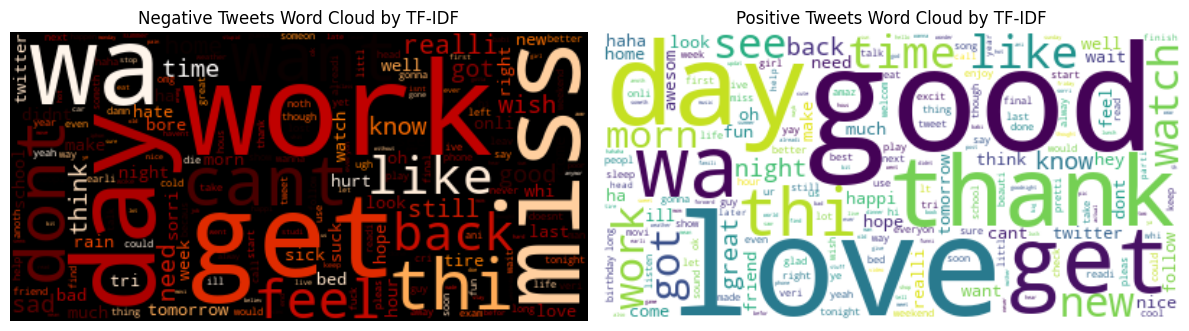

In [68]:
# Negative TF-IDF wordcloud
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud_tfidf, interpolation = 'bilinear')
plt.title("Negative Tweets Word Cloud by TF-IDF")
plt.axis('off')

# Positive TF-IDF wordcloud
plt.subplot(1, 2, 2)
plt.imshow(positive_wordcloud_tfidf, interpolation = 'bilinear')
plt.title("Positive Tweets Word Cloud by TF-IDF")
plt.axis('off')

plt.tight_layout()
plt.show()

TF-IDF 사용 후 변화는 다음과 같다.</br>
Negative에서는 'work', 'miss', 'dont', 'wa', 'cant'가 부정적인 단어로 많이 쓰인다.</br>
Positive에서는 'thank', 'love', 'good', 'like'가 긍정적인 단어로 많이 쓰인다.</br>
결과를 보면, TF-IDF를 사용했더라도, Negative와 Positive 모두에서 공통적으로 나타나는 단어들이 보여지기는 한다. 이는 TF-IDF 방식 자체가 완전한 해결책은 아니라는 것을 보여준다. 하지만 'think'와 같이 단어 빈도가 기반이 되는 Word Cloud에서 나타나는 단어들이 이번 Word Cloud에서는 공통적으로 보여지지 않으며, 'good'과 같이 전에는 positive에서 나타나지 않았던 긍정적인 단어들이 Word Cloud에서 큰 글자로 등장하는 것을 보면, 특정 측면에서는 성능에서 향상되었다고 볼 수 있을 것이다.

## 팀 활동 요구사항

제공된 데이터셋과 유사한 데이터셋을 웹 스크레이핑을 통해 만든 다음, word cloud를 만들어 봅시다.</br>
데이터셋을 만들 때 어떤 작업들이 추가적으로 필요할까요?</br>
prototyping에는 최소 1,000개 이상의 데이터를 사용하세요.

우리는 Google Play에서 '현대 블루링크' 앱의 리뷰를 웹 스크레이핑하여 데이터셋을 만들었다.

In [49]:
# 현대 블루링크 앱 리뷰 웹 스크래핑
package_name = "com.velox.hkmc_tm1k"
app_info = app(package_name)
print("앱 이름:", app_info['title'])

review_list = []

# 앱 리뷰 가져오기
# 별점 1 ~ 4 각각 400개씩
for i in range(1,5) :
    reviews_result, _ = reviews(
        package_name,
        lang='ko',  # 한국어
        country='kr',  # 한국 사용자
        count=400,  # 가져올 리뷰 수
        filter_score_with= i  # 특정 평점 필터링
    )
    for review in reviews_result:
        review_list.append({'rating' : review['score'], 'review' : review['content']})

# 별점 5 800개
reviews_result, _ = reviews(
    package_name,
    lang='ko',  
    country='kr',
    count=800,  
    filter_score_with=5
)
for review in reviews_result:
    review_list.append({'rating' : review['score'], 'review' : review['content']})


review_data = pd.DataFrame(review_list)
review_data

앱 이름: 현대 블루링크


,rating,review
0,1,SNS 아이디로 로그인 할 수 있게 버튼을 만들어달라.
1,1,업데이트 이후 빌트인캠상태 먹통입니딘
2,1,업데이트를 강제함
3,1,"포터2 lpg 최신네비에 블루링크가 문 열기 닫기만 될거면, 블루링크 쓰는 의미가 ..."
4,1,아무말도없이 갑자기 차량설정기능삭제하면 어쩝니까 원복바랍니다
...,...,...
2395,5,편리해요
2396,5,편리하게 잘 만들었어요
2397,5,편합니다
2398,5,기능추가요청 캠핑가서 차박할때 뒷창문만 모기장을 설치하는데 자다가 더우면 창문을 블...


감성 라벨링 기준은 다음과 같다.
- positive : rating 5
- neutral  : rating 3, 4
- negative : rating 1, 2 </br>
통상적으로 1, 2는 매우 부정적인 경험을 했던 상황에서 매기는 별점이고, 3, 4는 불편하지는 않지만 아쉬움이 남을 때 주는 별점이라고 생각하였기에 이를 기준으로 레이블을 달아주었다.</br>
감성 라벨의 데이터 수를 균등하게 맞추기 위해 별점이 1 ~ 4인 경우는 400개, 5인 경우는 500개를 가져오도록 하였다.

In [50]:
# 감성 라벨링
review_data['sentiment'] = review_data['rating'].apply(lambda x : 'positive' if x == 5 else ('negative' if x in (1,2) else 'neutral'))
review_data

,rating,review,sentiment
0,1,SNS 아이디로 로그인 할 수 있게 버튼을 만들어달라.,negative
1,1,업데이트 이후 빌트인캠상태 먹통입니딘,negative
2,1,업데이트를 강제함,negative
3,1,"포터2 lpg 최신네비에 블루링크가 문 열기 닫기만 될거면, 블루링크 쓰는 의미가 ...",negative
4,1,아무말도없이 갑자기 차량설정기능삭제하면 어쩝니까 원복바랍니다,negative
...,...,...,...
2395,5,편리해요,positive
2396,5,편리하게 잘 만들었어요,positive
2397,5,편합니다,positive
2398,5,기능추가요청 캠핑가서 차박할때 뒷창문만 모기장을 설치하는데 자다가 더우면 창문을 블...,positive


In [51]:
# sentiment 별 데이터 나누기
negative_data = review_data[review_data['sentiment'] == 'negative']
neutral_data = review_data[review_data['sentiment'] == 'neutral']
positive_data = review_data[review_data['sentiment'] == 'positive']

In [52]:
# review 열의 모든 문자열을 하나의 긴 문자열로 변환
negative_text = " ".join(negative_data['review'].astype(str))
neutral_text = " ".join(neutral_data['review'].astype(str))
positive_text = " ".join(positive_data['review'].astype(str))

의미있는 wordcloud를 만들기 위해서는 Negative한 반응을 보이는 사람들의 주된 원인을 찾아야할 것이다. '블루링크' 등과 같이 언급하는 빈도는 많지만, 실질적으로 얻을 수 있는 인사이트가 없는 것들을 제외하기 위하여 텍스트를 전처리한다.

In [53]:
# 데이터 전처리
okt = Okt()

# 조사 제거 함수
def remove_josa(text):
    tokens = okt.pos(text)  # 형태소 분석 및 품사 태깅
    filtered_tokens = [word for word, tag in tokens if tag != 'Josa']  # 조사를 제외
    return " ".join(filtered_tokens)  # 다시 문장으로 합치기

# 불용어 제거
def remove_stopwords(text) :
    file_path = "stopwords-ko.txt" # 일반적인 한국어 불용어 파일
    app_stopwords = ['블루', '링크', '블루링크', '앱'] # 빈도는 많지만 목적에 맞지 않은 단어들을 불용어로 추가
    with open(file_path, "r", encoding="utf-8") as file:
        stopwords = file.read().splitlines()
    # 불용어 추가
    stopwords.extend(app_stopwords)
    # 불용어 매핑 후 제거
    filtered_words = [word for word in text.split() if word not in stopwords]
    return " ".join(filtered_words)

# 전처리 함수
def preprocessed(text) :
    remove1 = remove_josa(text)
    remove2 = remove_stopwords(remove1)
    return remove2

negative_text = preprocessed(negative_text)
neutral_text = preprocessed(neutral_text)
positive_text = preprocessed(positive_text)

In [63]:
# wordcloud 생성
negative_wordcloud = WordCloud(font_path='/Users/admin/Library/Fonts/NanumGothic.otf',max_words=200, colormap = 'gist_heat_r').generate(negative_text)
neutral_wordcloud = WordCloud(font_path='/Users/admin/Library/Fonts/NanumGothic.otf',max_words=200, colormap = 'cool_r').generate(neutral_text)
positive_wordcloud = WordCloud(font_path='/Users/admin/Library/Fonts/NanumGothic.otf',max_words=200, colormap = 'berlin', background_color = 'white').generate(positive_text)

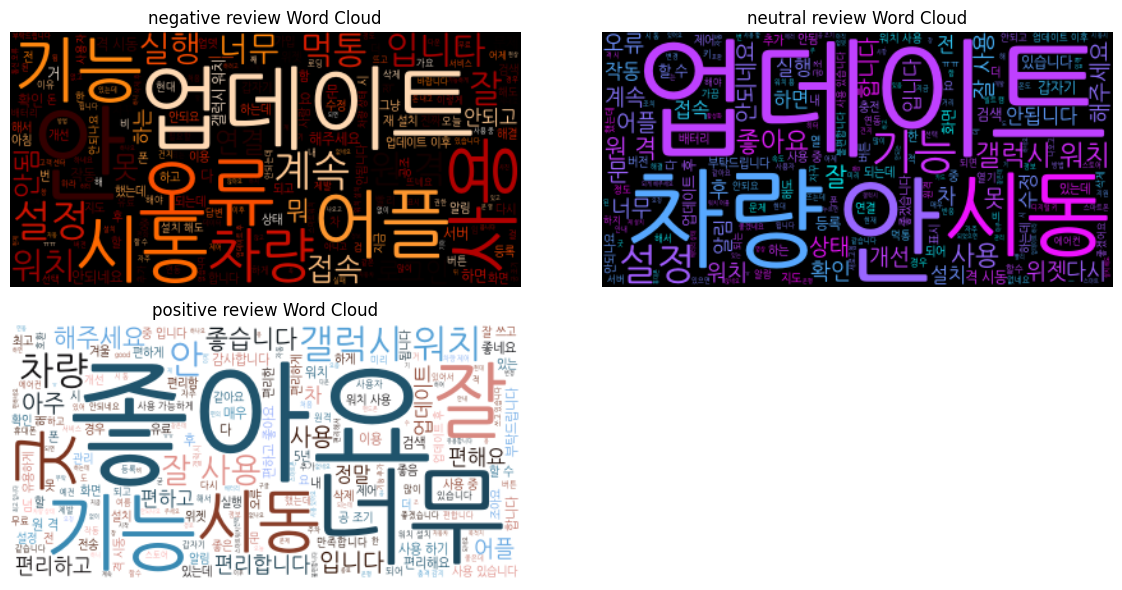

In [64]:
plt.figure(figsize = (12,6))

# Negative wordcloud
plt.subplot(2,2,1)
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.title("negative review Word Cloud")
plt.axis('off')

# Netural wordcloud
plt.subplot(2,2,2)
plt.imshow(neutral_wordcloud, interpolation = 'bilinear')
plt.title("neutral review Word Cloud")
plt.axis('off')

# Positive wordcloud
plt.subplot(2,2,3)
plt.imshow(positive_wordcloud, interpolation = 'bilinear')
plt.title("positive review Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()

해당 분석을 통해 어떤 비즈니스 가치를 만들 수 있을지에 대해 토의합시다.

먼저 앱 경험이 부정적인 사용자들의 리뷰를 통해 앱의 문제점이 무엇인지 파악할 수 있고, 이를 바탕으로 앱 개선 방향을 정할 수 있을 것이다. 또한 현대 블루 링크 앱에서는 부정적 리뷰의 단어를 보면 앱의 통신과 관련한 문제가 대부분이었기에 부정적인 사용자들의 차량 데이터를 수집할 수 있다면 앱 이외에 차량에서도 적극적인 개선을 이룩할 수 있을 것이다. 해당 앱 이외에도 추가적으로 사내에서 앱을 개발할텐데, 초기 단계에서부터 블루 링크 앱에서 발생했던 문제점을 염두해두며 개발을 진행한다면, 앱 배포 초기에 상대적으로 더 안정적인 구동이 가능할 것이다.</br>
앱 경험이 긍정적인 사용자들의 텍스트는 일반적인 사용자들이 앱의 어떤 부분에서 편리함을 느끼며 긍정적인 반응을 하는지 알 수 있으며, 앱 개발 및 업데이트 과정에서 사용자들이 새로운 경험하게 된다면, 어떠한 반응을 보이는 지에 대해서도 파악할 수 있을 것이다.</br>
추가적으로 앱 버젼도 구글 플레이에서 웹 스크래이핑이 가능한데, 이를 통해 데이터를 세분화한다면 버젼에 따라 사용자 반응과 문제 사항이 변화하는 추이를 알 수 있을 것이다.</br>
블루 링크와 비슷한 성격을 띄는 앱을 개발한 다른 경쟁사에서 동일한 분석을 진행한다면, 같은 인사이트를 뽑아낼 수 있을 것이고, 그들과 비교하며 개선할 점과 추가하면 좋을 기능을 찾을 때 도움이 될 것이다.